In [62]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score, recall_score, precision_score, accuracy_score, roc_auc_score, f1_score

In [91]:
day_offset = 0

# exp_dir = 'experiments/bert/SP_day_offset_{}'.format(day_offset)
exp_dir = 'experiments/bert/SP_base'
orig_file = 'data/combined_result_day_offset_{}.tsv'.format(day_offset)
true_file = 'glue_data/SP_day_offset_{}/test.tsv'.format(day_offset)
pred_file = '{}/test_results.tsv'.format(exp_dir)

In [92]:
df_orig = pd.read_csv(orig_file, sep='\t')
df_true = pd.read_csv(true_file, sep='\t')
df_pred = pd.read_csv(pred_file, header=None, sep='\t')

In [93]:
# maps the shuffled indices to orig labels
y_true = df_orig.iloc[df_true['index'].values,:]['sp_label'].values
len(y_true)

18342

In [94]:
y_pred = df_pred[1].apply(round).values
len(y_pred)

18342

In [95]:
# tn, fp, fn, tp
cm = confusion_matrix(y_true, y_pred)
tn, fp, fn, tp = cm.ravel()


In [96]:
print('Precision: {0:.2%}'.format(precision_score(y_true, y_pred)))
print('   Recall: {0:.2%}'.format(recall_score(y_true, y_pred)))
print(' Accuracy: {0:.2%}'.format(accuracy_score(y_true, y_pred)))
print('  ROC AUC: {0:.2%}'.format(roc_auc_score(y_true, y_pred)))

Precision: 38.65%
   Recall: 91.62%
 Accuracy: 40.38%
  ROC AUC: 49.79%


In [101]:
recall_score(y_true, y_pred)

0.9161626107750739

In [102]:
accuracy_score(y_true, y_pred)

0.40382728164867515

[Text(0, 0.5, '--'), Text(0, 1.5, '++')]

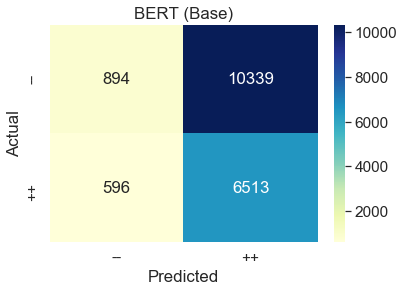

In [103]:
ax = plt.subplot()
sn.set(font_scale=1.4)#for label size
sn.heatmap(cm, annot=True, fmt='g', cmap="YlGnBu", ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('BERT (Base)'.format(day_offset))
ax.xaxis.set_ticklabels(['--', '++'])
ax.yaxis.set_ticklabels(['--', '++'])

## Precision and Recall

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.39')

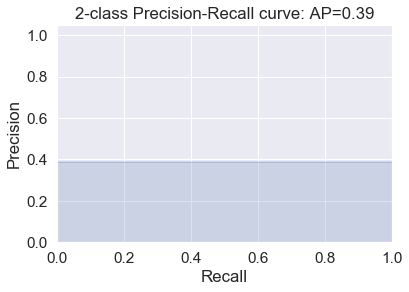

In [105]:
average_precision = average_precision_score(y_true, y_pred)

precision, recall, _ = precision_recall_curve(y_true, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

[1.         0.00450134 0.        ]


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

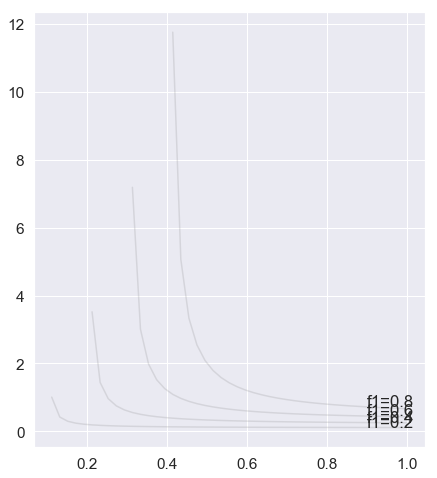

In [35]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')

print(recall)
precision["micro"]

l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()